In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)
n_simulations = 10000

def run_monte_carlo(adoption_rate, gdp_mean, gdp_std, job_mean, job_std, emission_mean, emission_std, 
                    multiplier_mean, multiplier_std, export_revenue_mean, export_revenue_std,
                    fossil_job_loss_mean, fossil_job_loss_std, fossil_revenue_loss_mean, fossil_revenue_loss_std,
                    electricity_price_increase_mean, electricity_price_increase_std,
                    market_concentration_increase_mean, market_concentration_increase_std,
                    tax_revenue_mean, tax_revenue_std,
                    waste_management_cost_mean, waste_management_cost_std):
    gdp_impact = np.random.normal(gdp_mean, gdp_std, n_simulations)
    job_creation = np.random.normal(job_mean, job_std, n_simulations)
    emission_reduction = np.random.normal(emission_mean, emission_std, n_simulations)
    multiplier_effect = np.random.normal(multiplier_mean, multiplier_std, n_simulations)
    export_revenue = np.random.normal(export_revenue_mean, export_revenue_std, n_simulations)
    fossil_job_loss = np.random.normal(fossil_job_loss_mean, fossil_job_loss_std, n_simulations)
    fossil_revenue_loss = np.random.normal(fossil_revenue_loss_mean, fossil_revenue_loss_std, n_simulations)
    electricity_price_increase = np.random.normal(electricity_price_increase_mean, electricity_price_increase_std, n_simulations)
    market_concentration_increase = np.random.normal(market_concentration_increase_mean, market_concentration_increase_std, n_simulations)
    tax_revenue = np.random.normal(tax_revenue_mean, tax_revenue_std, n_simulations)
    waste_management_cost = np.random.normal(waste_management_cost_mean, waste_management_cost_std, n_simulations)
    
    net_job_impact = job_creation - fossil_job_loss
    net_revenue_impact = export_revenue - fossil_revenue_loss + tax_revenue - waste_management_cost
    
    return gdp_impact, net_job_impact, emission_reduction, multiplier_effect, net_revenue_impact, electricity_price_increase, market_concentration_increase

def calc_ci(data, confidence=0.90):
    return stats.t.interval(confidence, len(data)-1, loc=np.mean(data), scale=stats.sem(data))

def plot_results(high_data, low_data, title, xlabel):
    plt.figure(figsize=(10, 6))
    plt.hist(high_data, bins=50, alpha=0.5, label='High Adoption (20%)')
    plt.hist(low_data, bins=50, alpha=0.5, label='Low Adoption (5%)')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


# Low Nuclear Adoption Scenario (5% by 2050)
low_gdp, low_jobs, low_emissions, low_multiplier, low_revenue, low_price, low_concentration = run_monte_carlo(
    adoption_rate=0.05,
    gdp_mean=0.25, gdp_std=0.05,  # GDP impact based on IEA (2022) projections indicating a potential GDP growth reduction with low nuclear adoption.
    job_mean=1500, job_std=400,  # Job creation estimate based on Clean Energy Council (2022) indicating lower job creation at 5% adoption.
    emission_mean=6.0, emission_std=1.2,  # Emissions reduction estimate based on AEMO projections for nuclear adoption scenarios.
    multiplier_mean=1.4, multiplier_std=0.2,  # Economic multiplier effect based on ABS data (2022) reflecting a conservative estimate in lower adoption scenarios.
    export_revenue_mean=0.4, export_revenue_std=0.15,  # Based on World Nuclear Association projections for limited nuclear exports under low adoption.
    fossil_job_loss_mean=3000, fossil_job_loss_std=600,  # Projected job losses in fossil fuel sectors due to nuclear transition (Clean Energy Council, 2022) reflecting higher losses in lower adoption scenarios.
    fossil_revenue_loss_mean=0.45, fossil_revenue_loss_std=0.1,  # Impact from reduced fossil fuel revenues due to nuclear adoption based on updated analyses.
    electricity_price_increase_mean=7, electricity_price_increase_std=1.5,  # Price increase estimate based on CSIRO reports on nuclear integration impacts reflecting higher costs in a low adoption scenario.
    market_concentration_increase_mean=3.0, market_concentration_increase_std=0.6,  # Market concentration analysis based on ACCC data (2023) indicating increased concentration risks in lower nuclear scenarios.
    tax_revenue_mean=0.1, tax_revenue_std=0.02,  # ax revenue impact based on government resource taxation trends reflecting lower revenues in a limited nuclear context.
    waste_management_cost_mean=0.6, waste_management_cost_std=0.15  # Waste management cost estimates from NEA (2021) report reflecting increased costs due to limited nuclear expansion.
)



# High Nuclear Adoption Scenario (20% by 2050)
high_gdp, high_jobs, high_emissions, high_multiplier, high_revenue, high_price, high_concentration = run_monte_carlo(
    adoption_rate=0.20,
    gdp_mean=1.5, gdp_std=0.3,  # Based on ANA (2023) estimate of 1.2% to 1.8% GDP growth
    job_mean=20000, job_std=5000,  # Based on estimate of 15,000-25,000 jobs by 2050
    emission_mean=27.5, emission_std=2.5,  # Based on 25-30% reduction in emissions
    multiplier_mean=2.5, multiplier_std=0.5,  # Based on ABS (2022) multiplier effect
    export_revenue_mean=2.5, export_revenue_std=0.5,  # Based on WNA (2023) projection
    fossil_job_loss_mean=10000, fossil_job_loss_std=2000,  # Based on Clean Energy Council (2022) estimate
    fossil_revenue_loss_mean=1.5, fossil_revenue_loss_std=0.3,  # Estimated impact on fossil fuel exports
    electricity_price_increase_mean=20, electricity_price_increase_std=5,  # Estimated based on CSIRO (2024) LCOE analysis
    market_concentration_increase_mean=10, market_concentration_increase_std=2,  # Estimated based on ACCC (2023) market share data
    tax_revenue_mean=0.5, tax_revenue_std=0.1,  # Estimated based on current resource taxation trends
    waste_management_cost_mean=2, waste_management_cost_std=0.5  # Based on NEA (2021) estimate for deep geological repository
)


# Very High Nuclear Adoption Scenario (40% by 2050)
very_high_gdp, very_high_jobs, very_high_emissions, very_high_multiplier, very_high_revenue, very_high_price, very_high_concentration = run_monte_carlo(
    adoption_rate=0.40,
    gdp_mean=2.5, gdp_std=0.4,  # Based on Clean Energy Council (2023) projections for economic growth from nuclear investment
    job_mean=30000, job_std=7500,  # Based on estimates of 20,000-30,000 jobs created by nuclear projects (Clean Energy Council, 2022)
    emission_mean=40, emission_std=3,  # Based on AEMO projections for a 40% reduction in emissions with nuclear adoption
    multiplier_mean=3.0, multiplier_std=0.5,  # Reflecting a higher economic output per dollar invested in nuclear infrastructure (ABS, 2022)
    export_revenue_mean=4.0, export_revenue_std=1.0,  # Estimated based on World Nuclear Association projections for increased uranium exports
    fossil_job_loss_mean=15000, fossil_job_loss_std=3000,  # Projected job losses in fossil fuel sectors due to nuclear transition (Clean Energy Council, 2022)
    fossil_revenue_loss_mean=2.0, fossil_revenue_loss_std=0.4,  # Estimated impact on fossil fuel exports due to nuclear adoption
    electricity_price_increase_mean=25, electricity_price_increase_std=5,  # Estimated increase based on transitioning costs to nuclear power (CSIRO LCOE analysis)
    market_concentration_increase_mean=15, market_concentration_increase_std=3,  # Based on ACCC data indicating potential market concentration changes
    tax_revenue_mean=1.0, tax_revenue_std=0.2,  # Increased tax revenue from nuclear operations (Clean Energy Council estimates)
    waste_management_cost_mean=5.0, waste_management_cost_std=1.0  # Estimated costs for long-term waste management solutions (NEA report)
)


print("\nLow Nuclear Adoption Scenario (5% by 2050):")
print(f"GDP Impact: Mean = {np.mean(low_gdp):.2f}%, 90% CI: {calc_ci(low_gdp)}")
print(f"Net Job Impact: Mean = {np.mean(low_jobs):.0f}, 90% CI: {calc_ci(low_jobs)}")
print(f"Emissions Reduction: Mean = {np.mean(low_emissions):.2f}%, 90% CI: {calc_ci(low_emissions)}")
print(f"Multiplier Effect: Mean = {np.mean(low_multiplier):.2f}, 90% CI: {calc_ci(low_multiplier)}")
print(f"Net Revenue Impact (AUD billion): Mean = {np.mean(low_revenue):.2f}, 90% CI: {calc_ci(low_revenue)}")
print(f"Electricity Price Increase: Mean = {np.mean(low_price):.2f}%, 90% CI: {calc_ci(low_price)}")
print(f"Market Concentration Increase: Mean = {np.mean(low_concentration):.2f}%, 90% CI: {calc_ci(low_concentration)}")



print("\nHigh Nuclear Adoption Scenario (20% by 2050):")
print(f"GDP Impact: Mean = {np.mean(high_gdp):.2f}%, 90% CI: {calc_ci(high_gdp)}")
print(f"Net Job Impact: Mean = {np.mean(high_jobs):.0f}, 90% CI: {calc_ci(high_jobs)}")
print(f"Emissions Reduction: Mean = {np.mean(high_emissions):.2f}%, 90% CI: {calc_ci(high_emissions)}")
print(f"Multiplier Effect: Mean = {np.mean(high_multiplier):.2f}, 90% CI: {calc_ci(high_multiplier)}")
print(f"Net Revenue Impact (AUD billion): Mean = {np.mean(high_revenue):.2f}, 90% CI: {calc_ci(high_revenue)}")
print(f"Electricity Price Increase: Mean = {np.mean(high_price):.2f}%, 90% CI: {calc_ci(high_price)}")
print(f"Market Concentration Increase: Mean = {np.mean(high_concentration):.2f}%, 90% CI: {calc_ci(high_concentration)}")


print("\nVery High Nuclear Adoption Scenario (40% by 2050):")
print(f"GDP Impact: Mean = {np.mean(very_high_gdp):.2f}%, 90% CI: {calc_ci(very_high_gdp)}")
print(f"Net Job Impact: Mean = {np.mean(very_high_jobs):.0f}, 90% CI: {calc_ci(very_high_jobs)}")
print(f"Emissions Reduction: Mean = {np.mean(very_high_emissions):.2f}%, 90% CI: {calc_ci(very_high_emissions)}")
print(f"Multiplier Effect: Mean = {np.mean(very_high_multiplier):.2f}, 90% CI: {calc_ci(very_high_multiplier)}")
print(f"Net Revenue Impact (AUD billion): Mean = {np.mean(very_high_revenue):.2f}, 90% CI: {calc_ci(very_high_revenue)}")
print(f"Electricity Price Increase: Mean = {np.mean(very_high_price):.2f}%, 90% CI: {calc_ci(very_high_price)}")
print(f"Market Concentration Increase: Mean = {np.mean(very_high_concentration):.2f}%, 90% CI: {calc_ci(very_high_concentration)}")


Low Nuclear Adoption Scenario (5% by 2050):
GDP Impact: Mean = 0.25%, 90% CI: (0.24906784999651416, 0.2507185516666432)
Net Job Impact: Mean = -1496, 90% CI: (-1507.581505905833, -1483.6866816382897)
Emissions Reduction: Mean = 5.99%, 90% CI: (5.965474011028353, 6.004615343618011)
Multiplier Effect: Mean = 1.40, 90% CI: (1.3951809302896363, 1.4017904794636014)
Net Revenue Impact (AUD billion): Mean = -0.55, 90% CI: (-0.5558180260130956, -0.5480949936068504)
Electricity Price Increase: Mean = 7.00%, 90% CI: (6.9731559812991994, 7.022850720722622)
Market Concentration Increase: Mean = 3.00%, 90% CI: (2.9932081927200427, 3.0129774525395776)

High Nuclear Adoption Scenario (20% by 2050):
GDP Impact: Mean = 1.50%, 90% CI: (1.4965036491059112, 1.5064420140350474)
Net Job Impact: Mean = 9983, 90% CI: (9894.67705998075, 10070.434533654774)
Emissions Reduction: Mean = 27.51%, 90% CI: (27.47034966433132, 27.55315173951782)
Multiplier Effect: Mean = 2.50, 90% CI: (2.4927034939880874, 2.509087366

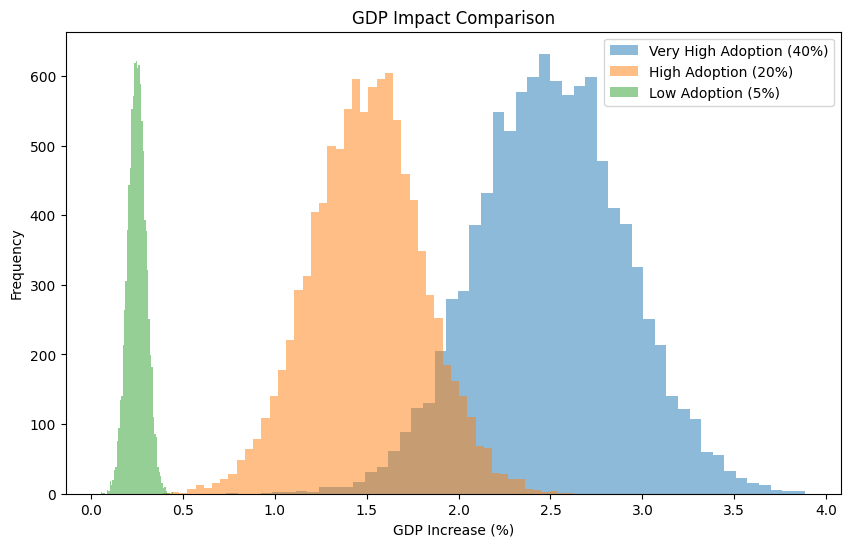

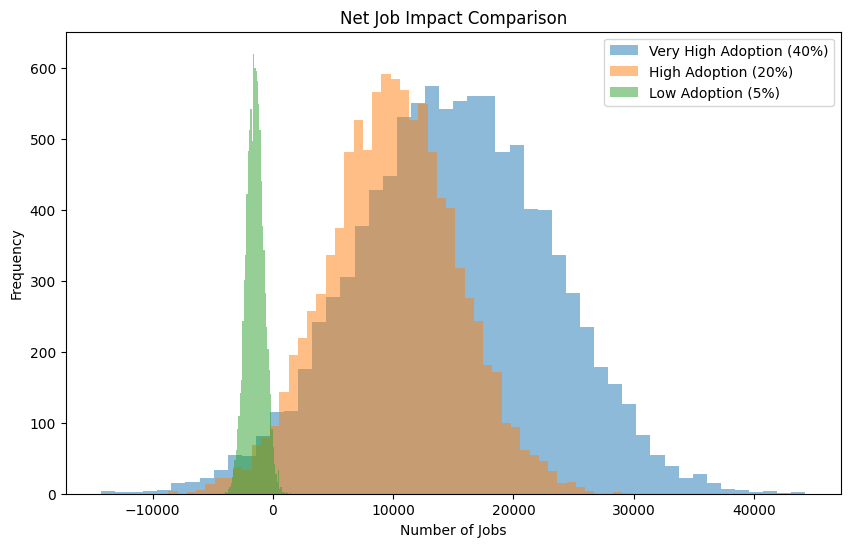

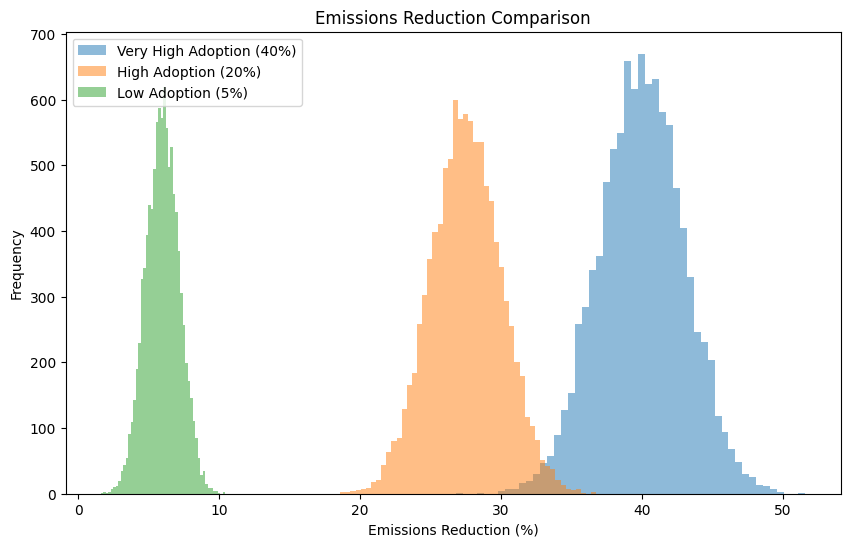

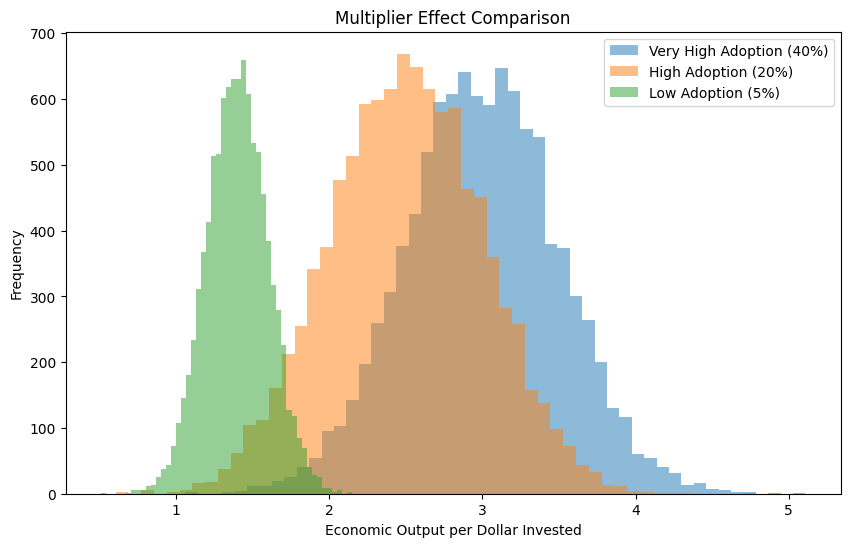

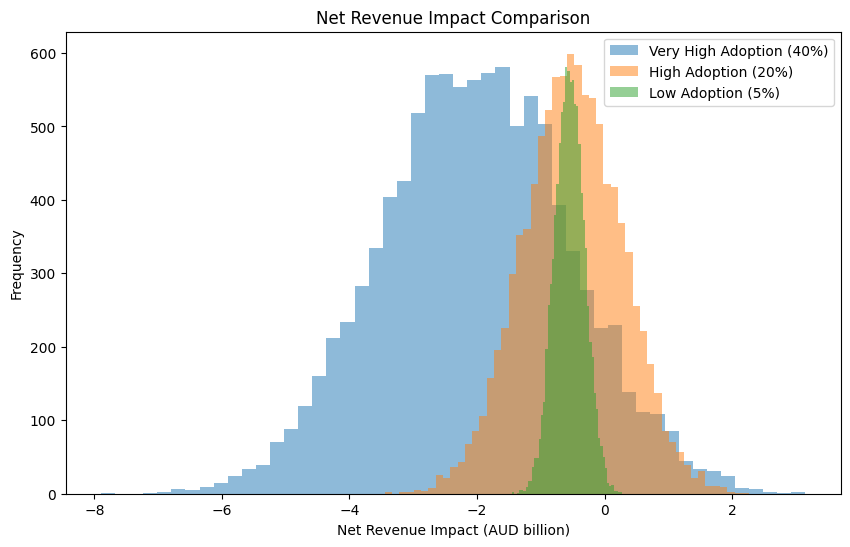

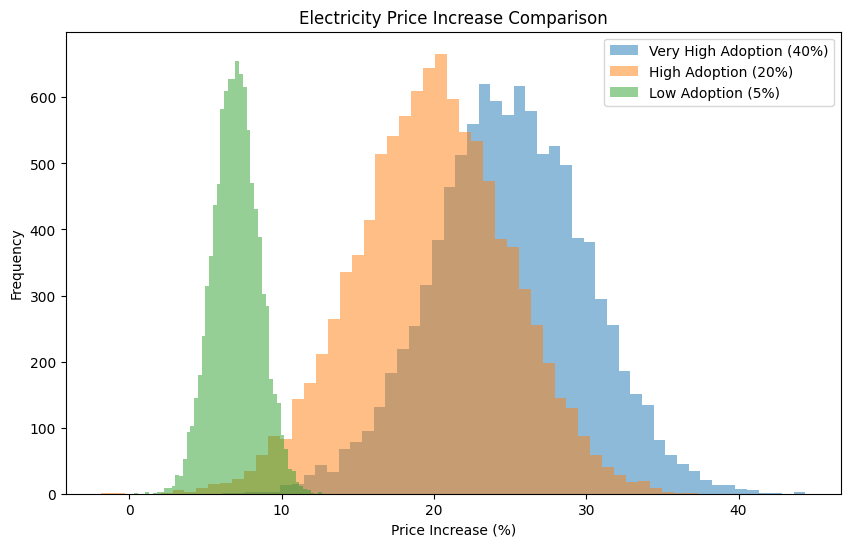

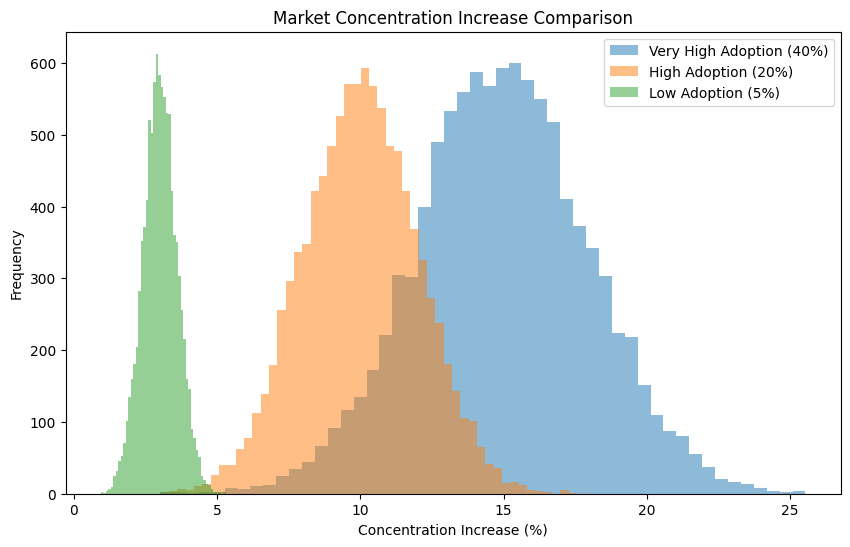

In [6]:
def plot_results(very_high_data, high_data, low_data, title, xlabel):
    plt.figure(figsize=(10, 6))
    plt.hist(very_high_data, bins=50, alpha=0.5, label='Very High Adoption (40%)')
    plt.hist(high_data, bins=50, alpha=0.5, label='High Adoption (20%)')
    plt.hist(low_data, bins=50, alpha=0.5, label='Low Adoption (5%)')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Plotting results for comparison
plot_results(very_high_gdp, high_gdp, low_gdp, 'GDP Impact Comparison', 'GDP Increase (%)')
plot_results(very_high_jobs, high_jobs, low_jobs, 'Net Job Impact Comparison', 'Number of Jobs')
plot_results(very_high_emissions, high_emissions, low_emissions, 'Emissions Reduction Comparison', 'Emissions Reduction (%)')
plot_results(very_high_multiplier, high_multiplier, low_multiplier, 'Multiplier Effect Comparison', 'Economic Output per Dollar Invested')
plot_results(very_high_revenue, high_revenue, low_revenue, 'Net Revenue Impact Comparison', 'Net Revenue Impact (AUD billion)')
plot_results(very_high_price, high_price, low_price, 'Electricity Price Increase Comparison', 'Price Increase (%)')
plot_results(very_high_concentration, high_concentration, low_concentration, 'Market Concentration Increase Comparison', 'Concentration Increase (%)')